In [1]:
from decisionTree_template import *
import treeplot

##  The  tree  drawn  based  on  the output obtained from the Car Dataset using your algorithm.

{'safety': {'high': {'passengers': {'more': {'trunck_size': {'med': 'acc', 'big': 'acc', 'small': 'acc'}}, '2': 'unacc', '4': {'trunck_size': {'med': 'acc', 'big': 'acc', 'small': 'acc'}}}}, 'med': {'passengers': {'more': {'trunck_size': {'med': 'acc', 'big': 'acc', 'small': 'unacc'}}, '2': 'unacc', '4': {'trunck_size': {'med': 'acc', 'big': 'acc', 'small': 'unacc'}}}}, 'low': 'unacc'}}


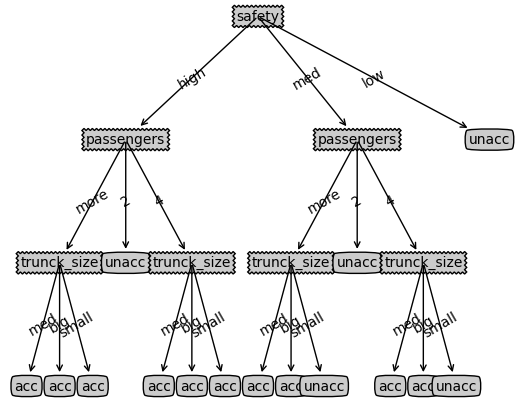

In [2]:
data_car, featNames_car = loadDataSet('car.csv')
dtTree_car = buildTree(data_car, featNames_car)
print(dtTree_car)
treeplot.createPlot(dtTree_car)

## The code of the two functions that you implement.

In [3]:
def chooseBestFeature(dataSet):
    '''
    choose best feature to split based on Gini index
    
    Parameters
    -----------------
    dataSet: 2-D list
        [n_sampels, m_features + 1]
        the last column is class label

    Returns
    ------------------
    bestFeatId: int
        index of the best feature
    '''
    #TODO
    #for feature in range(dataSet.shape[1]-1):
    # dictionary to store the best split
    best_split_index = -1
    max_info_gain = -float("inf")
    #dataSet = np.array(dataSet)
    num_features = len(dataSet[0])
    num_sampels = len(dataSet)
    labels = [instance[-1] for instance in dataSet]
    parent_gini = gini_index(labels)
    # loop over all the features and check the information gain 
    for feature_index in range(num_features-1):
        feature_values = [dataSet[i][feature_index] for i in range(num_sampels)]
        sum_child_gini = 0
        for feature in list(set(feature_values)):
            data_after_split = splitData(dataSet, feature_index, feature)
            feature_gini = gini_index([instance[-1] for instance in data_after_split])
            sum_child_gini += (len(data_after_split)/num_sampels)*feature_gini
        curr_info_gain = parent_gini - sum_child_gini
        #print(f"Gain for {feature_index} is | {parent_gini} - {sum_child_gini} = {curr_info_gain}")
        if curr_info_gain>max_info_gain:
            best_split_index = feature_index
            max_info_gain = curr_info_gain

    # return best split
    return best_split_index
    
def gini_index(y):
    ''' function to compute gini index '''
    class_labels = list(set(y))
    gini = 0
    for cls in class_labels:
        p_cls = y.count(cls) / len(y)
        gini += p_cls**2
    return 1 - gini

def stopCriteria(dataSet):
    '''
    Criteria to stop splitting: 
    1) if all the classe labels are the same, then return the class label;
    2) if there are no more features to split, then return the majority label of the subset.

    Parameters
    -----------------
    dataSet: 2-D list
        [n_sampels, m_features + 1]
        the last column is class label

    Returns
    ------------------
    assignedLabel: string
        if satisfying stop criteria, assignedLabel is the assigned class label;
        else, assignedLabel is None 
    '''
    #assignedLabel = None
    # TODO
    classLabels = [instance[-1] for instance in dataSet]

    # Check if all class labels are the same
    #if classLabels.count(classLabels[0]) == len(classLabels):
    if len(set(classLabels)) == 1:
        assignedLabel = classLabels[0]
    # Check if there are no more features to split
    elif len(dataSet[0]) == 1:
        assignedLabel = majorityLabel(classLabels)
    else:
        assignedLabel = None
    return assignedLabel

def majorityLabel(classLabels):
    labelCounts = {}
    for label in classLabels:
        if label in labelCounts:
            labelCounts[label] += 1
        else:
            labelCounts[label] = 1

    majorityLabel = max(labelCounts, key=labelCounts.get)
    return majorityLabel